In [3]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline 
    # Говорим jupyter'у, чтобы весь графический вывод был в браузере, а не в отдельном окне
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения
plt.style.use('default')
sns.set(rc={"figure.figsize": (8, 4)})
pd.options.display.max_rows=1000

**1. Описание данных**

Датасет представляет собой совокупность данных по людям, самостоятельно обучающимся программированию в 2016 году. В датасете представлено 15620 записей. Данные были собаны порталом freeCodeCamp.org

**Постановка задачи:**\
С помощью методов машинного обучения, научить модель определять шансы человека на успешную самостоятельную переквалификацию в сфере IT:

С помощью методов машинного обучения, научить модель определять EmploymentStatus - статус найма человека:

Состояние	и описание на русском\
'Employed for wages' - нанят на оплачиваемуюю должность\
'Not working but looking for work' - не работает, но находится в активном поиске\
'Self-employed freelancer' - самозанятый фрилансер\
'Not working and not looking for work' - не рабтает и не ищет работу\
'Self-employed business owner' - самозанятый владелец бизнеса\
'Doing an unpaid internship' - неоплачиваемая интернатура\
'A stay-at-home parent or homemaker' - находится в декретном отпуске или домохозяин(йка)\
'Able to work' - в труоспособном состоянии\
'Military' - нахдится на военной службе\
'Retired' -  на пенсии



**2. Чтение и разбор данных**


In [4]:
url = "https://raw.githubusercontent.com/RadaevValentin/Machine_Learning_course/main/2016-FCC-New-Coders-Survey-Data.csv"
full_dataset = pd.read_csv(url, sep=',',engine = 'python')



Вначале посмотрим на размеры таблицы - количество строк (каждая строка соответствует одному студенту) и количество столбцов (каждый столбец соответствует конкретному признаку):


Размерность датасета:

In [5]:
full_dataset.shape

(15620, 114)

**Данные и их типы:**
1. Age	- возраст студента, количественный
2. Age range	- возрастная группа студентов (по декадам), номинальный
3. AttendedBootcamp	- факт посещения студентом буткемпа, номинальный
4. BootcampFinish	- факт окончания студентом буткемпа, номинальный
5. BootcampFullJobAfter	- факт получения стужентом работы после окончания буткемпа, номинальный
6. BootcampLoanYesNo	- факт получения студентом займа, для участия в буткемпе, номинальный
7. BootcampMonthsAgo	- количество месяцев, прошедших с посещения последнего буткемпа, количественный
8. Bootcampme	- имя буткемпа, номинальный
9. BootcampPostSalary	- заработная плата, по окончанию буткемпа, количественный
10. BootcampRecommend	- факт рекомендации студентом,посещенного буткемпа
11. ChildrenNumber	- число детей у студента, количественный
12. CityPopulation	- население города, в котором проживает студент, номинальный
13. CodeEventBootcamp	- факт посещения буткемпов, номинальный
14. CodeEventCoffee	- факт посещения тематических кофе брейков по программированию, номинальный
15. CodeEventConferences	- факт посещения конференций по программированию, номинальный
16. CodeEventDjangoGirls	- факт посещения мероприятий Django Girls, номинальный
17. CodeEventGameJam	- факт посещения мероприятий Game Jam, номинальный
18. CodeEventGirlDev	- факт посещения мероприятий Girl Dev, номинальный
19. CodeEventHackathons	- факт посещения хакатонов, номинальный
20. CodeEventMeetup	- факт посещения митапов, номинальный
21. CodeEventNodeSchool	- факт посещения Node School, номинальный
22. CodeEventNone	- факт непосещения любых мероприятий по программированию, номинальный
23. CodeEventOther	- факт посещения прочих мероприятий по программированию, номинальный
24. CodeEventRailsBridge	- факт посещения мероприятий Rails Bridge, номинальный
25. CodeEventRailsGirls	- факт посещения мероприятий Rails Girls, номинальный
26. CodeEventStartUpWknd	- факт посещения мероприятий Start Up weekend, номинальный
27. CodeEventWomenCode	- факт посещения мероприятий Women Code, номинальный
28. CodeEventWorkshop	- факт посещения воркшопов по программированию, номинальный
29. CommuteTime	- время ответа, номинальный
30. CountryCitizen	- гражданство, номинальный
31. CountryLive	- страна проживания, номинальный
32. EmploymentField	- трудовая сфера, номинальный
33. EmploymentFieldOther	- прочая трудовая сфера, номинальный
34. EmploymentStatus	- статус найма, номинальный
35. EmploymentStatusOther	- прочий статус найма, номинальный
36. ExpectedEarning	- ожидаемый заработок, количественный
37. FinciallySupporting	- факт наличия финансовой поддержки у студента, номинальный
38. Gender	- пол, номинальный
39. HasChildren	- факт наличия детей, номинальный
40. HasDebt	- факт наличия финансовых задолженностей у студента, номинальный
41. HasFincialDependents	- факт наличия финансово зависимых от студента людей, номинальный
42. HasHighSpdInternet	- факт наличия у студента высокоскоростного интернета, номинальный
43. HasHomeMortgage	- факт наличия у студента ипотеки на жилье, номинальный
44. HasServedInMilitary	- факт службы студентом в армии, номинальный
45. HasStudentDebt	- факт наличия у студента долгов за образование, номинальный
46. HomeMortgageOwe	- величина задолженности по ипотечному кредиту, количественный
47. HoursLearning	- количество часов,затрачиваемых на учебу, в неделю, количественный
48. ID.x	- уникальный идентификатор студента, номинальный
49. ID.y	- уникальный идентификатор студента, номинальный
50. Income	- величина дохода студента, количественный
51. IsEthnicMinority	- студент является этническим меньшенством, номинальный
52. IsReceiveDiabilitiesBenefits	- студент получает пособие по инвалидности, номинальный
53. IsSoftwareDev	- студент  является инженером-разработчиком ПО, номинальынй
54. IsUnderEmployed	- студент трудоустроен на текущий момент, номинальный
55. JobApplyWhen	- срок, в течение которого студент попытается устроиться на работу, номинальный
56. JobPref	- предпочтения по работе у студента, номинальный
57. JobRelocateYesNo	- студент готов релоцироваться при найме, номинальный
58. JobRoleInterest	- интересующая должность, номинальный
59. JobRoleInterestOther	- прочие интересующие должности, номинальный
60. JobWherePref	- желаемый вид работы, удаленно или из офиса, номинальный
61. LanguageAtHome	- родной язык, номинальный
62. MaritalStatus	- семейное положение, номинальный
63. MoneyForLearning	- обьем имеющихся сбережений на обучение, количественный
64. MonthsProgramming	- стаж программирования в месяцах, количественный
65. NetworkID	- уникальный идентификатор студента, номинальный
66. Part1EndTime	- время регистрации ответа респондента, номинальный
67. Part1StartTime	- время регистрации ответа респондента, номинальный
68. Part2EndTime	- время регистрации ответа респондента, номинальный
69. Part2StartTime	- время регистрации ответа респондента, номинальный
70. PodcastChangeLog	- факт прослушивания подкаста Chane Log, номинальный
71. PodcastCodeNewbie	- факт прослушивания подкаста Code Newbie, номинальный
72. PodcastCodingBlocks	- факт прослушивания подкаста Coding Blocks, номинальный
73. PodcastDeveloperTea	- факт прослушивания подкаста Developer Tea, номинальный
74. PodcastDotNetRocks	- факт прослушивания подкаста Dot Net Rocks, номинальный
75. PodcastHanselminutes	- факт прослушивания подкаста Hansel minutes, номинальный
76. PodcastJSJabber	- факт прослушивания подкаста US Jabber, номинальный
77. PodcastJsAir	- факт прослушивания подкаста Us Air, номинальный
78. PodcastNone	- факт непрослушивания каких-либо тематических подскастов, номинальный
79. PodcastOther	- факт прослушивания прочих подкастов, номинальный
80. PodcastProgrammingThrowDown	- факт прослушивания подкаста Programming Throw Down, номинальный
81. PodcastRubyRogues	- факт прослушивания подкаста Ruby Rogues, номинальный
82. PodcastSEDaily	- факт прослушивания подкаста SE Daily, номинальный
83. PodcastShopTalk	- факт прослушивания подкаста Shop Talk, номинальный
84. PodcastTalkPython	- факт прослушивания подкаста Talk Python, номинальный
85. PodcastWebAhead	- факт прослушивания подкаста Web Ahead, номинальный
86. ResourceBlogs	- факт пользования ресурсом Blogs, номинальный
87. ResourceBooks	- факт пользования ресурсом Books, номинальный
88. ResourceCodeWars	- факт пользования ресурсом Code Wars, номинальный
89. ResourceCodecademy	- факт пользования ресурсом Codecademy, номинальный
90. ResourceCoursera	- факт пользования ресурсом Coursera, номинальный
91. ResourceDevTips	- факт пользования ресурсом DevTips, номинальный
92. ResourceEdX	- факт пользования ресурсом EdX, номинальный
93. ResourceEggHead	- факт пользования ресурсом EggHead, номинальный
94. ResourceFCC	- факт пользования ресурсом FCC, номинальный
95. ResourceGoogle	- факт пользования ресурсом Google, номинальный
96. ResourceHackerRank	- факт пользования ресурсом HackerRank, номинальный
97. ResourceKhacademy	- факт пользования ресурсом Khacademy, номинальный
98. ResourceLynda	- факт пользования ресурсом Lynda, номинальный
99. ResourceMDN	- факт пользования ресурсом MDN, номинальный
100. ResourceOdinProj	- факт пользования ресурсом OdinProj, номинальный
101. ResourceOther	- факт пользования прочими реусурсами, номинальный
102. ResourcePluralSight	- факт пользования ресурсом PluralSight, номинальный
103. ResourceReddit	- факт пользования ресурсом Reddit, номинальный
104. ResourceSkillCrush	- факт пользования ресурсом SkillCrush, номинальный
105. ResourceSoloLearn	- факт пользования ресурсом SoloLearn, номинальный
106. ResourceStackOverflow	- факт пользования ресурсом StackOverflow, номинальный
107. ResourceTreehouse	- факт пользования ресурсом Treehouse, номинальный
108. ResourceUdacity	- факт пользования ресурсом Udacity, номинальный
109. ResourceUdemy	- факт пользования ресурсом Udemy, номинальный
110. ResourceW3Schools	- факт пользования ресурсом W3Schools, номинальный
111. ResourceYouTube	- факт пользования ресурсом Blogs, номинальный
112. SchoolDegree	- уровень образования, номинальный
113. SchoolMajor	- направление обучения, номинальный
114. StudentDebtOwe	- задолженность студента за учебу, количественный


In [4]:
full_dataset.columns.to_list()

['Age',
 'Age range',
 'AttendedBootcamp',
 'BootcampFinish',
 'BootcampFullJobAfter',
 'BootcampLoanYesNo',
 'BootcampMonthsAgo',
 'Bootcampme',
 'BootcampPostSalary',
 'BootcampRecommend',
 'ChildrenNumber',
 'CityPopulation',
 'CodeEventBootcamp',
 'CodeEventCoffee',
 'CodeEventConferences',
 'CodeEventDjangoGirls',
 'CodeEventGameJam',
 'CodeEventGirlDev',
 'CodeEventHackathons',
 'CodeEventMeetup',
 'CodeEventNodeSchool',
 'CodeEventNone',
 'CodeEventOther',
 'CodeEventRailsBridge',
 'CodeEventRailsGirls',
 'CodeEventStartUpWknd',
 'CodeEventWomenCode',
 'CodeEventWorkshop',
 'CommuteTime',
 'CountryCitizen',
 'CountryLive',
 'EmploymentField',
 'EmploymentFieldOther',
 'EmploymentStatus',
 'EmploymentStatusOther',
 'ExpectedEarning',
 'FinciallySupporting',
 'Gender',
 'HasChildren',
 'HasDebt',
 'HasFincialDependents',
 'HasHighSpdInternet',
 'HasHomeMortgage',
 'HasServedInMilitary',
 'HasStudentDebt',
 'HomeMortgageOwe',
 'HoursLearning',
 'ID.x',
 'ID.y',
 'Income',
 'IsEthni

**Анализ данных**:\
Проанализируем данные в датасете при помощи метода describe()


In [5]:
full_dataset.describe(include="all")

Age Age range  ...       SchoolMajor  StudentDebtOwe
count   13613.000000     13613  ...              8450     3514.000000
unique           NaN         8  ...               426             NaN
top              NaN     20-29  ...  Computer Science             NaN
freq             NaN      6976  ...              1387             NaN
mean       29.175421       NaN  ...               NaN    34556.143711
std         9.017716       NaN  ...               NaN    54423.139781
min        10.000000       NaN  ...               NaN        0.000000
25%        23.000000       NaN  ...               NaN    10000.000000
50%        27.000000       NaN  ...               NaN    20000.000000
75%        33.000000       NaN  ...               NaN    40000.000000
max        86.000000       NaN  ...               NaN  1000000.000000

[11 rows x 114 columns]

Для номинальных данных нам интересны следующие показатели: общее количество непустых значений (count), количество уникальных значений (unique), самое часто повторяющееся значение (top), количство повторений top значения (freq).\
Остальные показатели нам будут интересны при оценке количественных показателей: минимальное и максимальное значения, квартили (25%, 50%, 75%), среднее арифметическое (mean) и стандартное отклонение(std).

Проанализировав результаты можно сделать следующие выводы:
*   пустые столбцы отсутствуют
*   самым распространенным рабочим статусом является Employed for wages, то есть устроенные на работу с зарплатой, с частотой повторения 720
*   самой распространённой сферой деятельностью является software development and IT с 4349 повторений
*  в некоторых столбцах присутствуют пустые значени




. 



 **Визуализация данных:**

Рассмотрим зависимость затрачиваемого времени на обучение и возраст студентов

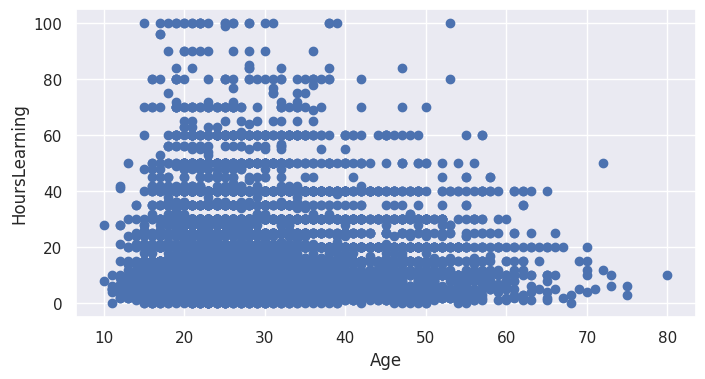

In [9]:
plt.scatter(full_dataset['Age'], full_dataset['HoursLearning']) 
plt.xlabel('Age')
plt.ylabel('HoursLearning')
pass

На диаграмме видно, что присутствует выбросы, которые не позволяют корректно визуализировать данные. Попробуем выбрать данные для рандомной группы студентов.

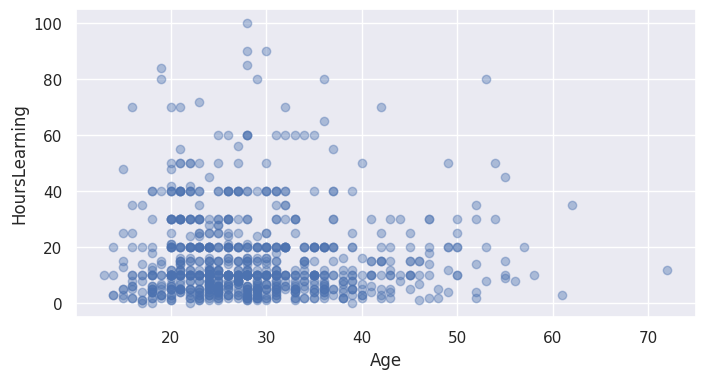

In [10]:
np.random.seed(13)
random_subset = np.random.choice(np.arange(full_dataset.shape[0]), size=1000, replace=False)

plt.scatter(full_dataset.iloc[random_subset]['Age'], full_dataset.iloc[random_subset]['HoursLearning'], alpha=0.4)
plt.xlabel('Age')
plt.ylabel('HoursLearning')
pass

На диаграмме видно, что присутствует выбросы, которые не позволяют корректно визуализировать данные.
Для того, чтобы избавиться от этих выбросов, найдем квантили для этих двух показателей

In [ ]:
full_dataset['Age'].quantile([0.001,.005,.05,.080,.09,.1,.5,.9,.95,.99,.995])

0.001    12.0
0.005    14.0
0.050    18.0
0.080    19.0
0.090    19.0
0.100    20.0
0.500    27.0
0.900    42.0
0.950    47.0
0.990    57.0
0.995    61.0
Name: Age, dtype: float64

Как мы видим на участке до 0.005 возраст студентов меньше 14 лет, что не подходит нам по условиям, так как мы рассматриваем проблему трудоустройства.

In [ ]:
full_dataset['HoursLearning'].quantile([0.005,.007,.02,.05,.080,.09,.1,.3,.5,.9,.95,.99,.995])

0.005     0.0
0.007     0.0
0.020     1.0
0.050     2.0
0.080     2.0
0.090     3.0
0.100     3.0
0.300     6.0
0.500    10.0
0.900    35.0
0.950    40.0
0.990    70.0
0.995    80.0
Name: HoursLearning, dtype: float64

Как мы видим, на участке до0.01 студенты заявляли, что вообще не тратят на обучение время. Это негативно сказывается  на общей картине. Также сомнительно выглядят заявления о том, что некоторые студенты тратят более 80 часов на обучение (участок от 0.995 до 1).

In [ ]:
full_dataset['MonthsProgramming'].quantile([0.001,.005,.05,.080,.09,.1,.5,.9,.95,.99,.995])

0.001      0.0
0.005      0.0
0.050      1.0
0.080      1.0
0.090      1.0
0.100      1.0
0.500      9.0
0.900     60.0
0.950    100.0
0.990    240.0
0.995    360.0
Name: MonthsProgramming, dtype: float64

Занесем очищенные данные в новую переменную clear_dataset

In [6]:
to_delete = full_dataset[
    (full_dataset['Age'] < full_dataset['Age'].quantile(0.005)) | 
    (full_dataset['HoursLearning']  < full_dataset['HoursLearning'].quantile(0.007)) | (full_dataset['HoursLearning']  > full_dataset['HoursLearning'].quantile(0.995))].index
clear_dataset = full_dataset.drop(to_delete)


clear_dataset.shape

(15504, 114)

Посмотрим как будет выглядеть предыдущая диаграмма

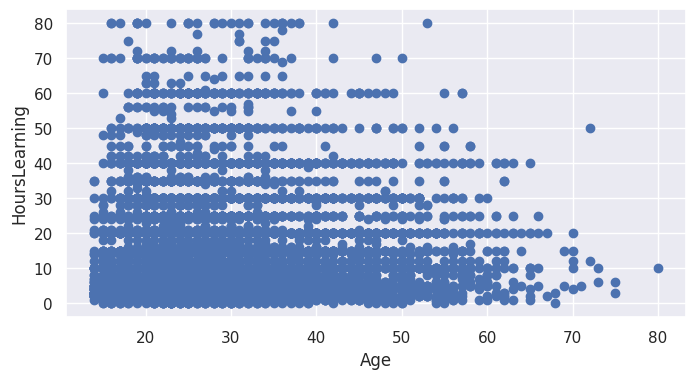

In [ ]:
plt.scatter(clear_dataset['Age'], clear_dataset['HoursLearning']) 
plt.xlabel('Age')
plt.ylabel('HoursLearning')
pass

Из-за большой плотности точек нельзя точно сказать как распределяется время занятий в зависимости от возраста. Отрисуем результат на меньшей выборке

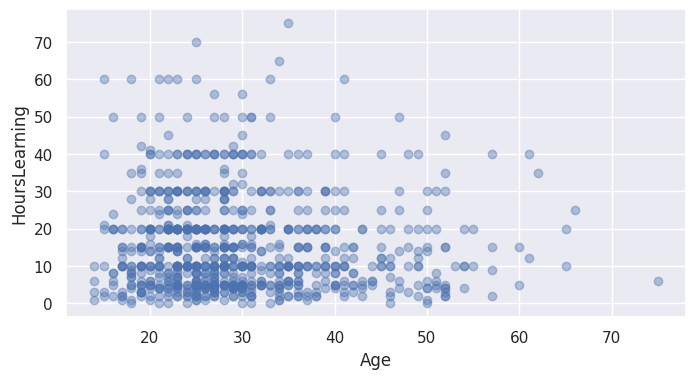

In [ ]:
np.random.seed(13)
random_subset = np.random.choice(np.arange(clear_dataset.shape[0]), size=1000, replace=False)

plt.scatter(clear_dataset.iloc[random_subset]['Age'], clear_dataset.iloc[random_subset]['HoursLearning'], alpha=0.4)
plt.xlabel('Age')
plt.ylabel('HoursLearning')
pass

Сейчас лучше видна линейная зависимость времени, уделяемому на учебу и возраста студентов.

**Визуализация данных**\
Добавляем признак, по которому классифицируем данные \
За рабочий статус студента отвечает цвет, за опыт в программировании - размер. Оси ординат и абцисс - возраст и затрачиваемое время соотвественно.

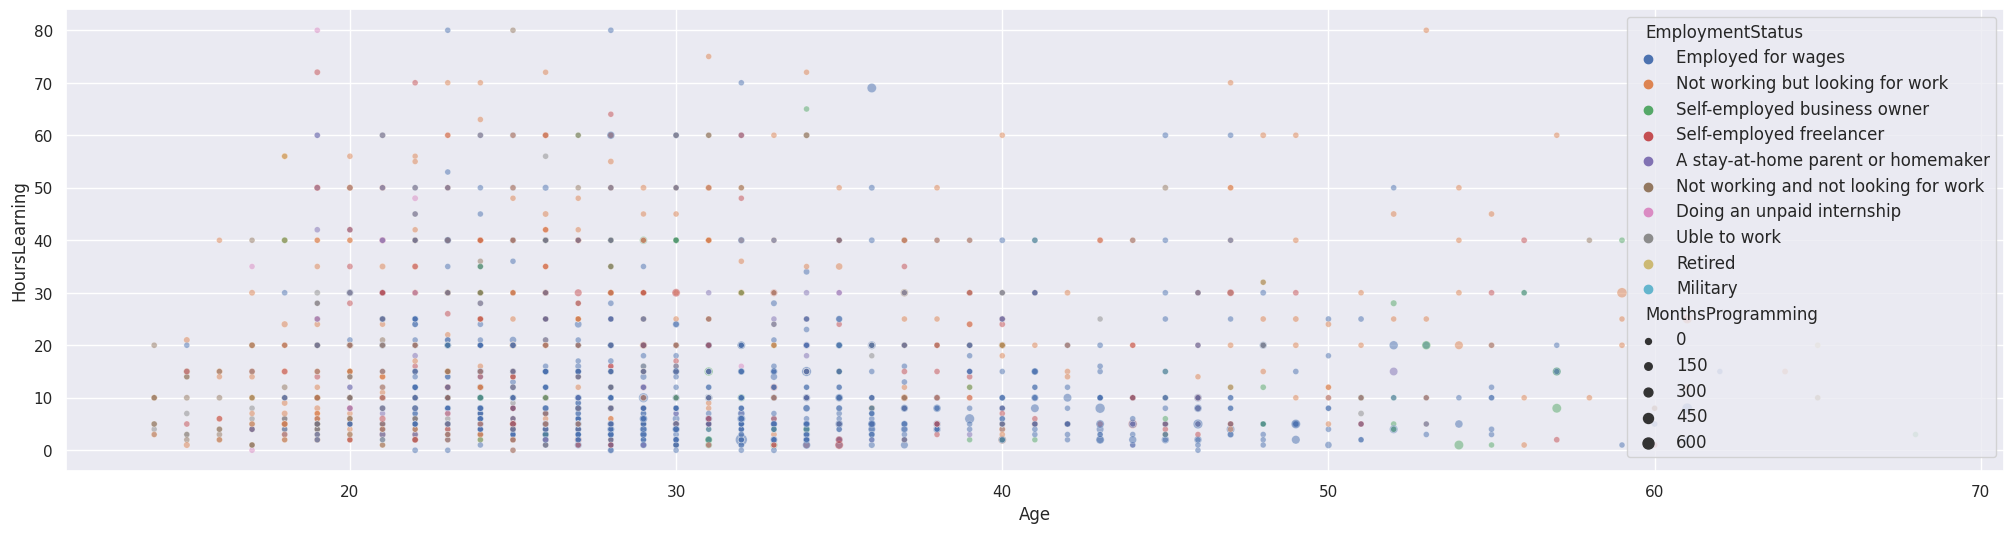

In [ ]:
np.random.seed(73)
random_subset = np.random.choice(np.arange(clear_dataset.shape[0]), size=3000, replace=False)
plt.figure(figsize = (25, 6))
sns.scatterplot(x='Age', y='HoursLearning', size='MonthsProgramming', hue='EmploymentStatus', data=clear_dataset.iloc[random_subset], alpha=0.5)



*   Наблюдается корреляция между возрастом и временем затрачиваемым на учебу
*   Хорошо прослеживается зависимости трудового статуса от возраста. Основная масса работающих людей после 25 лет. Также в группе трудоустроеных наблюдается зависимость времени затрачиваемого  на учебу и возраста.
*   Большая часть людей, которые тратят более 30 часов на обучение, - безработные или самозанятые люди.

Построим все возможные диаграммы рассеивания для каждой пары переменных, на малой выборке. 

In [ ]:
short_dataset=clear_dataset



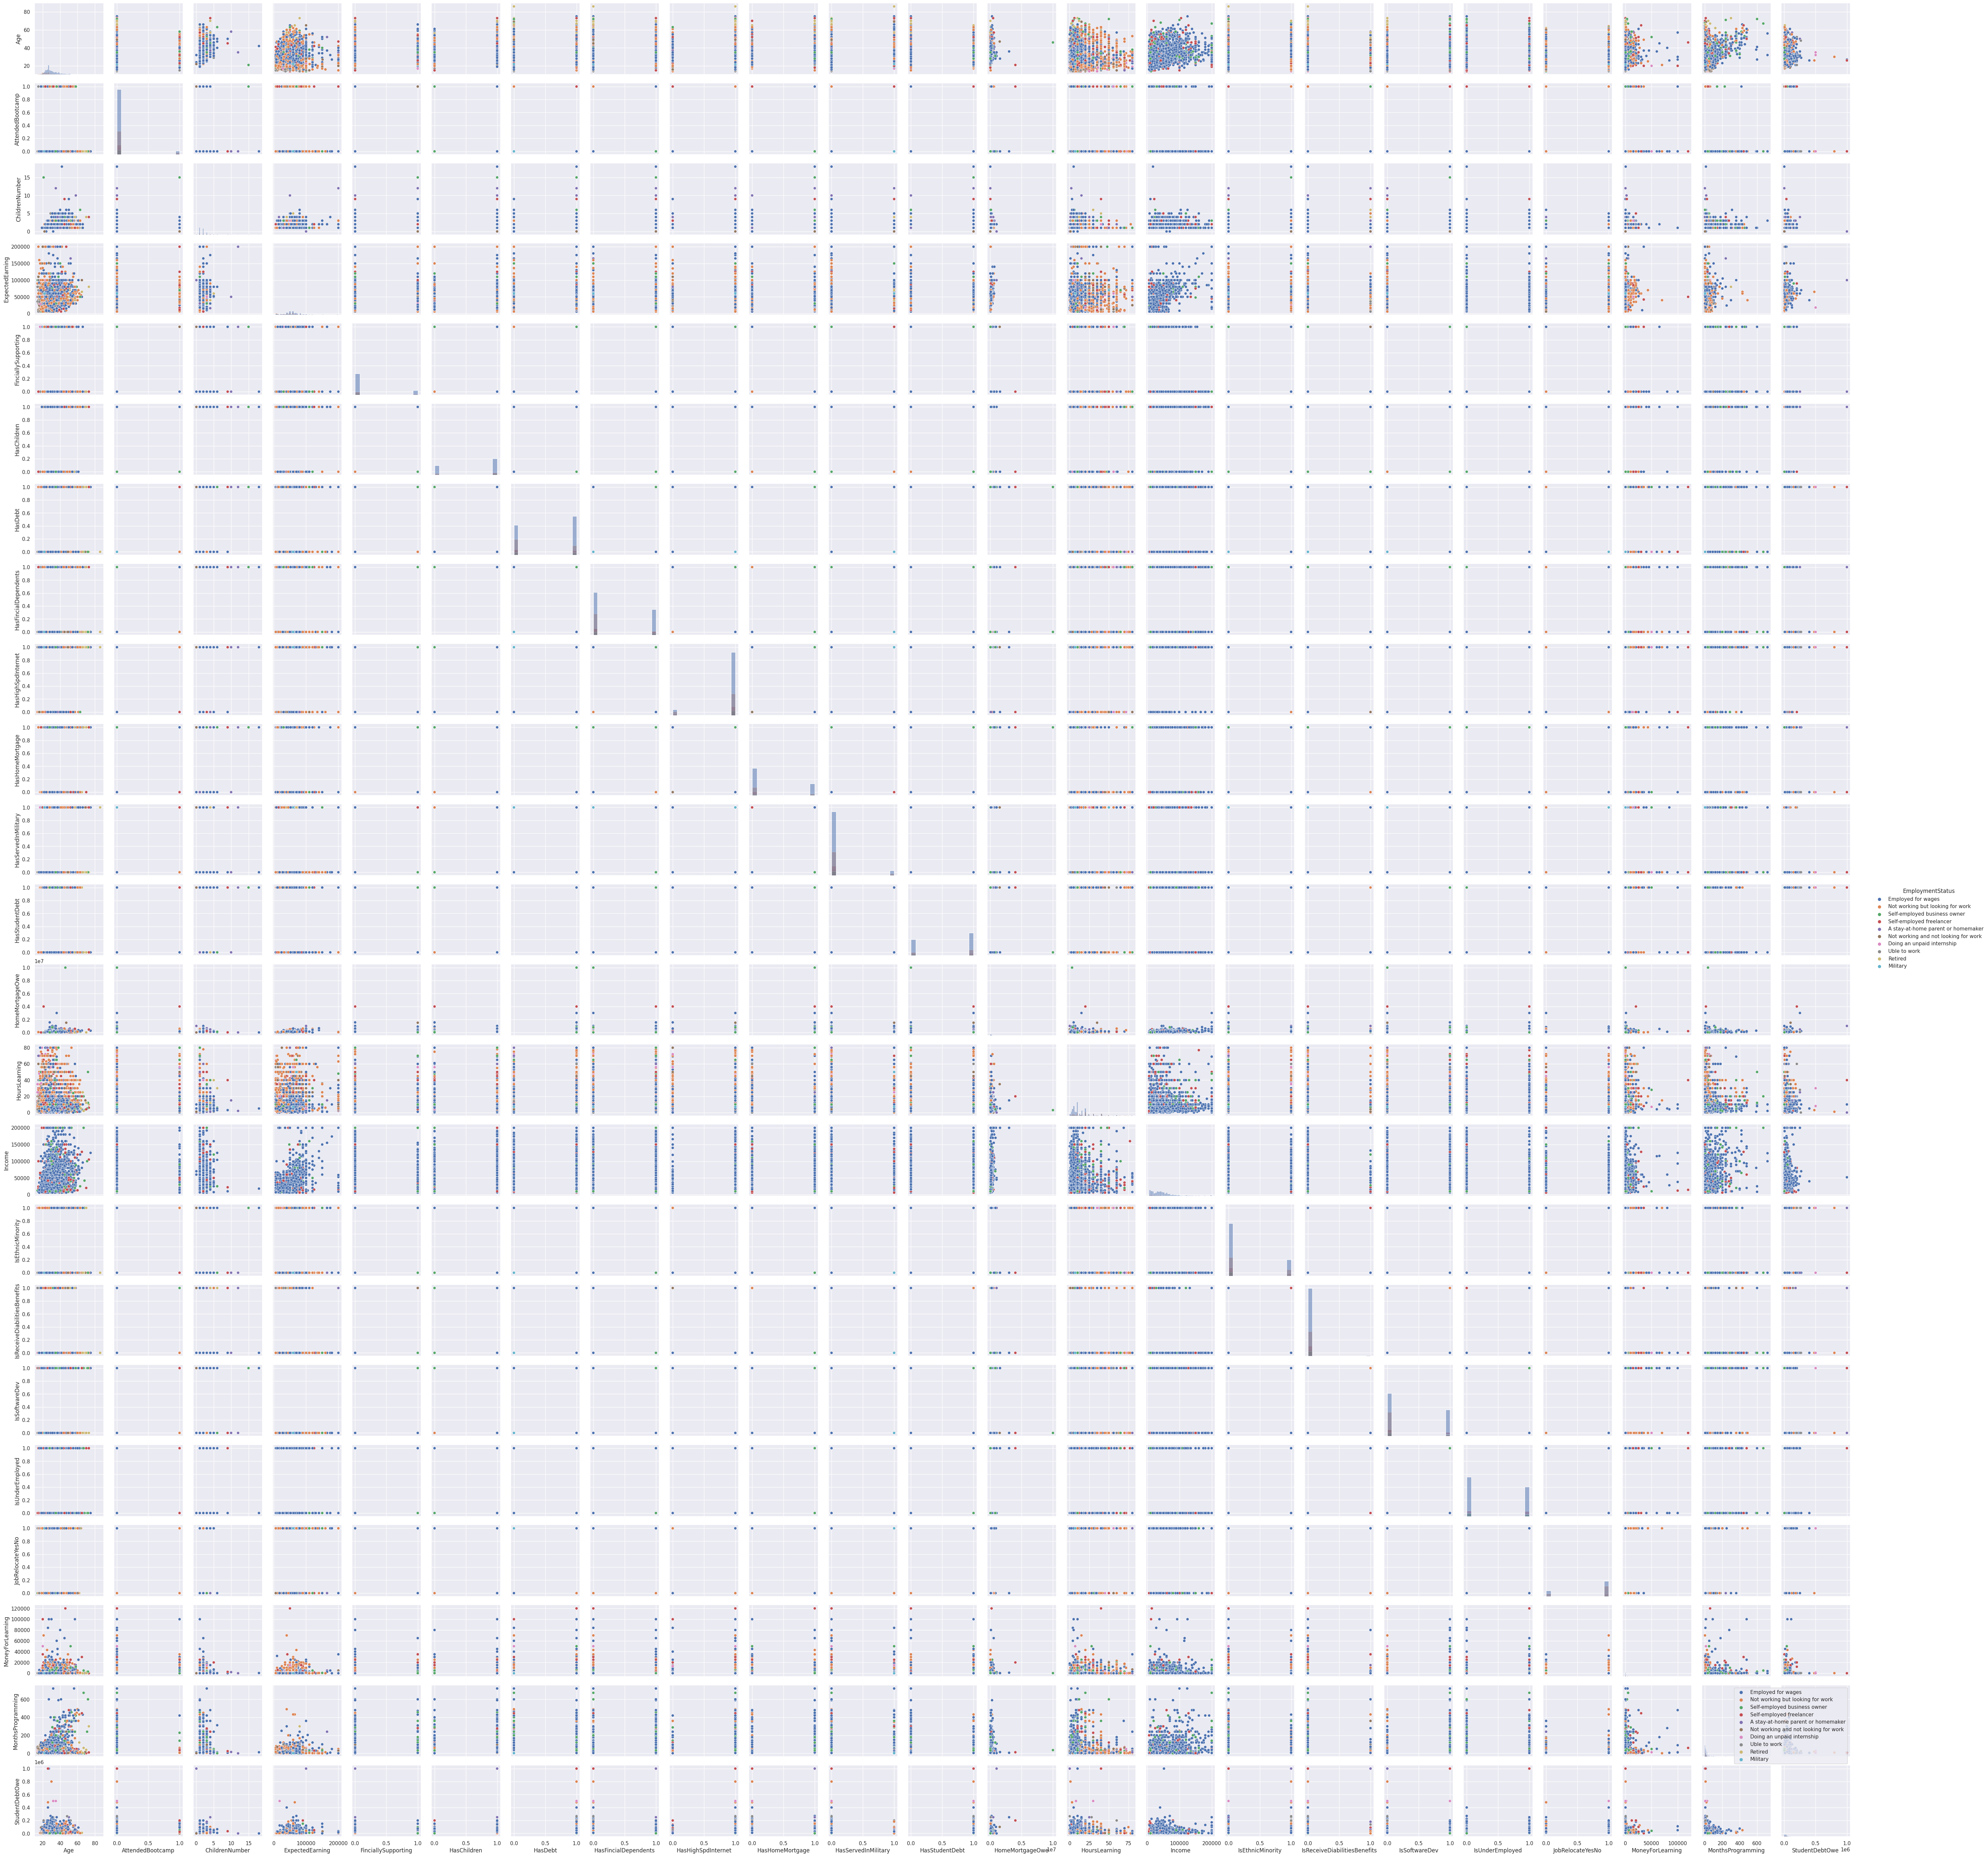

In [ ]:
np.random.seed(13)
random_subset = np.random.choice(np.arange(short_dataset.shape[0]), size=10000, replace=False)
sns.pairplot(short_dataset.iloc[random_subset], hue='EmploymentStatus', diag_kind='hist')
plt.legend()
pass

На диаграммах видны следующие зависимости:
*   Возраст/Ожидаемый доход
*   Возраст/Количество часов, потраченных на обучение в неделю
*   Возраст/Деньги потраченные на учебу
*   Возраст/Стаж программирования в месяцах
*   Количество детей/Количество часов, потраченных на обучение в неделю
*   Ожидаемый заработок/ Деньги, затрачиваемые на обучение







Рассмотрим распределение наших основных показателей: времени затраченного на обучение, возраста, затрачиваемого времени, ожидаемой зарплаты и имеющегося опыта в программировании.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


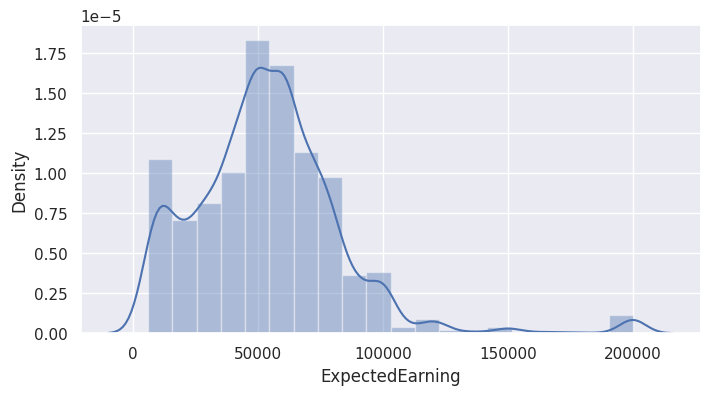

In [ ]:
sns.distplot(clear_dataset['ExpectedEarning'], bins = 20)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


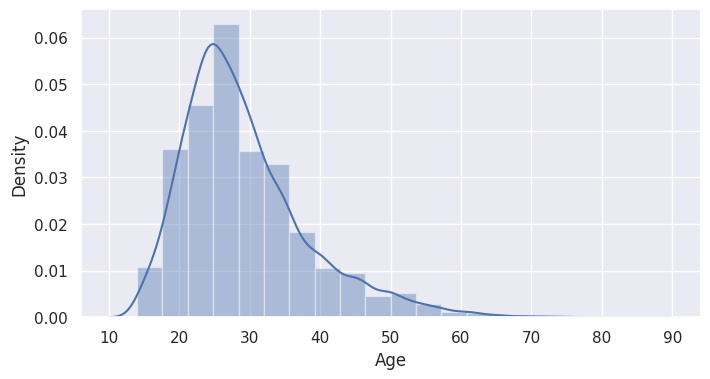

In [ ]:
sns.distplot(clear_dataset['Age'], bins = 20)
pass

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


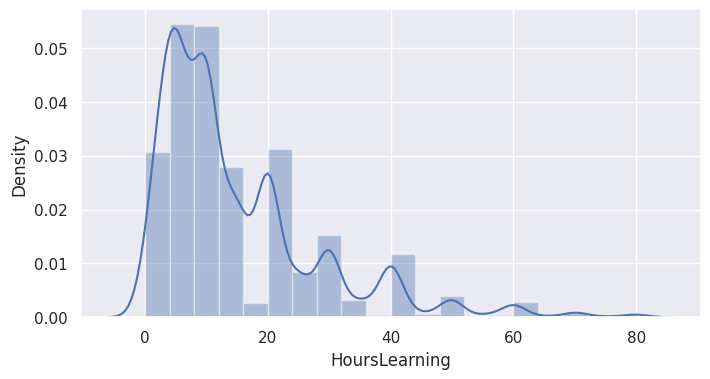

In [ ]:
sns.distplot(clear_dataset['HoursLearning'], bins = 20)
pass

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


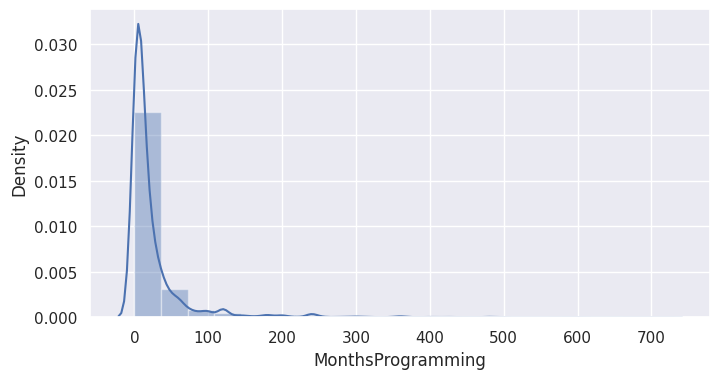

In [ ]:
sns.distplot(clear_dataset['MonthsProgramming'], bins = 20)
pass

Построим кореляционную матрицудля оценки степени зависимости количественных признаков друг от друга

In [ ]:
correl = clear_dataset.corr()
correl

Age  ...  StudentDebtOwe
Age                           1.000000  ...        0.118239
AttendedBootcamp              0.053278  ...       -0.011262
ChildrenNumber                0.243178  ...        0.033822
ExpectedEarning               0.108358  ...        0.142072
FinciallySupporting          -0.100036  ...       -0.004706
HasChildren                   0.454778  ...        0.049597
HasDebt                       0.283037  ...             NaN
HasFincialDependents          0.372064  ...        0.016528
HasHighSpdInternet            0.171188  ...        0.059589
HasHomeMortgage               0.371651  ...        0.038767
HasServedInMilitary           0.195805  ...       -0.026077
HasStudentDebt               -0.237161  ...             NaN
HomeMortgageOwe               0.044391  ...        0.491645
HoursLearning                -0.024694  ...       -0.014474
Income                        0.258223  ...        0.083548
IsEthnicMinority             -0.007810  ...        0.065612
IsReceiveDiabilitiesBenefits  0.051773  ...        0.009614
IsSoftwareDev                 0.008266  ...       -0.025789
IsUnderEmployed               0.027578  ...        0.053089
JobRelocateYesNo             -0.202084  ...       -0.020078
MoneyForLearning              0.097857  ...        0.048086
MonthsProgramming             0.221143  ...       -0.001960
StudentDebtOwe                0.118239  ...        1.000000

[23 rows x 23 columns]

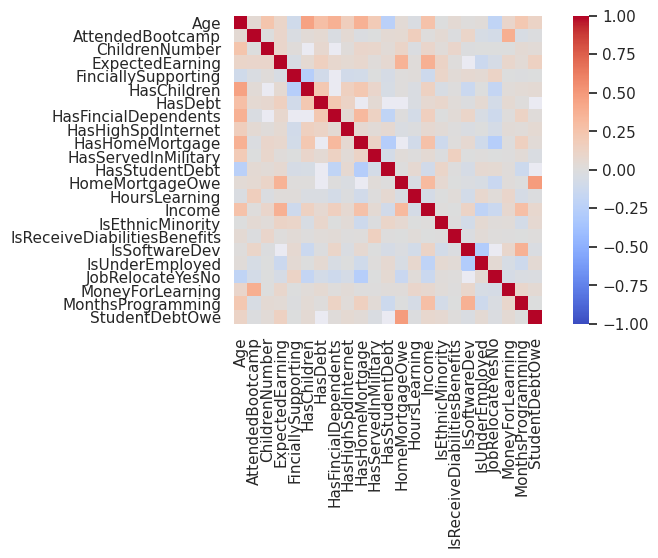

In [ ]:
sns.heatmap(correl, square=True, cmap='coolwarm', vmin=-1, vmax=1, center= 0,  yticklabels=1)
pass

In [ ]:
correl.where(np.triu(correl > 0.2, k=1) | np.triu(correl < -0.2, k=1)).stack().sort_values(ascending=False)

HomeMortgageOwe       StudentDebtOwe          0.491645
Age                   HasChildren             0.454778
AttendedBootcamp      MoneyForLearning        0.385406
ExpectedEarning       Income                  0.381811
Age                   HasFincialDependents    0.372064
                      HasHomeMortgage         0.371651
IsSoftwareDev         MonthsProgramming       0.367453
ExpectedEarning       HomeMortgageOwe         0.367153
HasFincialDependents  HasHomeMortgage         0.328088
HomeMortgageOwe       Income                  0.315892
Age                   HasDebt                 0.283037
Income                MonthsProgramming       0.281643
HasHomeMortgage       Income                  0.268690
Age                   Income                  0.258223
                      ChildrenNumber          0.243178
HasChildren           HasHomeMortgage         0.222912
                      HasDebt                 0.222819
Age                   MonthsProgramming       0.221143
HasDebt   

Корреляция наблюдается у 26-х пар признаков:



Проанализируем номинальные признаки

In [ ]:
clear_dataset['CityPopulation'].value_counts(dropna=False)

more than 1 million              5519
between 100,000 and 1 million    4882
less than 100,000                3125
NaN                              1978
Name: CityPopulation, dtype: int64

In [ ]:
clear_dataset['Age range'].value_counts(dropna=False)

20-29    6949
30-39    3632
NaN      1996
40-49    1200
10-19    1199
50-59     428
60-69      85
70-79      13
80-89       2
Name: Age range, dtype: int64

In [ ]:
clear_dataset['CountryCitizen'].value_counts(dropna=False)

United States of America    5933
NaN                         1955
India                       1139
United Kingdom               537
Cada                         487
                            ... 
Greda                          1
Hawaii                         1
Lesotho                        1
Malawi                         1
Reunion                        1
Name: CountryCitizen, Length: 167, dtype: int64

In [ ]:
clear_dataset['CountryLive'].value_counts(dropna=False)

United States of America    6218
NaN                         2000
India                        968
United Kingdom               612
Cada                         535
                            ... 
Martinique                     1
Virgin Islands (British)       1
Mozambique                     1
Haiti                          1
Reunion                        1
Name: CountryLive, Length: 157, dtype: int64

In [ ]:
clear_dataset['EmploymentField'].value_counts(dropna=False)

NaN                                      7917
software development and IT              4331
education                                 609
arts, entertainment, sports, or media     415
office and administrative support         413
sales                                     335
food and beverage                         279
fince                                     274
health care                               264
architecture or physical engineering      150
transportation                            149
software development                      134
construction and extraction               118
legal                                      68
law enforcement and fire and rescue        29
farming, fishing, and forestry             19
Name: EmploymentField, dtype: int64

In [ ]:
clear_dataset['EmploymentStatus'].value_counts(dropna=False)

Employed for wages                      7188
NaN                                     2677
Not working but looking for work        2607
Self-employed freelancer                1090
Not working and not looking for work     688
Self-employed business owner             494
Doing an unpaid internship               255
A stay-at-home parent or homemaker       220
Uble to work                             187
Military                                  60
Retired                                   38
Name: EmploymentStatus, dtype: int64

In [ ]:
clear_dataset['Gender'].value_counts(dropna=False)

male           10676
female          2828
NaN             1862
genderqueer       65
agender           38
trans             35
Name: Gender, dtype: int64

In [ ]:
clear_dataset['HasFincialDependents'].value_counts(dropna=False)

0.0    9516
1.0    4018
NaN    1970
Name: HasFincialDependents, dtype: int64

In [ ]:
clear_dataset['HasHighSpdInternet'].value_counts(dropna=False)

1.0    11902
NaN     1981
0.0     1621
Name: HasHighSpdInternet, dtype: int64

In [ ]:
clear_dataset['AttendedBootcamp'].value_counts(dropna=False)

0.0    14325
1.0      941
NaN      238
Name: AttendedBootcamp, dtype: int64

In [ ]:
clear_dataset['FinciallySupporting'].value_counts(dropna=False)

NaN    11521
0.0     3203
1.0      780
Name: FinciallySupporting, dtype: int64

In [ ]:
clear_dataset['HasDebt'].value_counts(dropna=False)

0.0    7115
1.0    6390
NaN    1999
Name: HasDebt, dtype: int64

In [ ]:
clear_dataset['HasHomeMortgage'].value_counts(dropna=False)

NaN    9149
0.0    4574
1.0    1781
Name: HasHomeMortgage, dtype: int64

In [ ]:
clear_dataset['HasServedInMilitary'].value_counts(dropna=False)

0.0    12416
NaN     2057
1.0     1031
Name: HasServedInMilitary, dtype: int64

In [ ]:
clear_dataset['HasStudentDebt'].value_counts(dropna=False)

NaN    9149
1.0    3749
0.0    2606
Name: HasStudentDebt, dtype: int64

In [ ]:
clear_dataset['IsEthnicMinority'].value_counts(dropna=False)

0.0    10310
1.0     3230
NaN     1964
Name: IsEthnicMinority, dtype: int64

In [ ]:
clear_dataset['IsReceiveDiabilitiesBenefits'].value_counts(dropna=False)

0.0    13118
NaN     2077
1.0      309
Name: IsReceiveDiabilitiesBenefits, dtype: int64

In [ ]:
clear_dataset['IsSoftwareDev'].value_counts(dropna=False)

0.0    11138
1.0     4283
NaN       83
Name: IsSoftwareDev, dtype: int64

In [ ]:
clear_dataset['IsUnderEmployed'].value_counts(dropna=False)

NaN    6881
0.0    4988
1.0    3635
Name: IsUnderEmployed, dtype: int64

In [ ]:
clear_dataset['JobApplyWhen'].value_counts(dropna=False)

NaN                             8800
Within the next 6 months        2030
I haven't decided               1329
Within 7 to 12 months           1193
I'm already applying            1173
more than 12 months from now     979
Name: JobApplyWhen, dtype: int64

In [ ]:
clear_dataset['JobPref'].value_counts(dropna=False)

NaN                                 4410
work for a medium-sized company     3270
freelance                           2237
start your own business             2205
work for a startup                  2017
work for a multitiol corporation    1365
Name: JobPref, dtype: int64

In [ ]:
clear_dataset['JobRelocateYesNo'].value_counts(dropna=False)

NaN    10052
1.0     4010
0.0     1442
Name: JobRelocateYesNo, dtype: int64

In [ ]:
clear_dataset['JobRoleInterest'].value_counts(dropna=False)

NaN                                 9042
Full-Stack Web Developer            2554
  Front-End Web Developer           1365
Back-End Web Developer               700
  Data Scientist / Data Engineer     646
  Mobile Developer                   409
  User Experience Designer           274
  DevOps / SysAdmin                  219
  Product Mager                      191
  Quality Assurance Engineer         104
Name: JobRoleInterest, dtype: int64

In [ ]:
clear_dataset['JobRoleInterestOther'].value_counts(dropna=False)

NaN                            15307
Software Engineer                 37
Game Developer                    26
Undecided                         23
Cyber Security                    20
                               ...  
Systems Architect                  1
Business Developer                 1
Computer Science Researcher        1
Alyst                              1
Ux Researcher                      1
Name: JobRoleInterestOther, Length: 89, dtype: int64

In [ ]:
clear_dataset['JobWherePref'].value_counts(dropna=False)

NaN                                   8808
in an office with other developers    3804
no preference                         1684
from home                             1208
Name: JobWherePref, dtype: int64

In [ ]:
clear_dataset['LanguageAtHome'].value_counts(dropna=False)

English       7362
NaN           2028
Spanish        766
Russian        544
Hindi          445
              ... 
Hmong            1
Turkmen          1
Fiji Hindi       1
Chechen          1
Tswa             1
Name: LanguageAtHome, Length: 148, dtype: int64

In [ ]:
clear_dataset['MaritalStatus'].value_counts(dropna=False)

NaN                                11507
married or domestic partnership     2908
single, never married                853
divorced                             175
separated                             49
widowed                               12
Name: MaritalStatus, dtype: int64

In [ ]:
clear_dataset['SchoolDegree'].value_counts(dropna=False)

bachelor's degree                          5623
some college credit, no degree             2259
NaN                                        1925
master's degree (non-professiol)           1443
high school diploma or equivalent (GED)    1350
some high school                            749
professiol degree (MBA, MD, JD, etc.)       692
associate's degree                          649
trade, technical, or vocatiol training      443
no high school (secondary school)           212
Ph.D.                                       159
Name: SchoolDegree, dtype: int64

In [ ]:
clear_dataset['SchoolMajor'].value_counts(dropna=False)

NaN                                          7078
Computer Science                             1379
Information Technology                        407
Business Administration                       284
Economics                                     252
                                             ... 
Pharmaceutical Sciences                         1
Agricultural and Food Products Processing       1
Marine Biology and Oceanography                 1
Teacher Education for Multiple Levels           1
Sheet Metal Technology                          1
Name: SchoolMajor, Length: 426, dtype: int64

Несбалансированными можно назвать следующие классы: \
IsReceiveDiabilitiesBenefits - 83,98% отрицательных ответов\
HasServedInMilitary - 79,48% отрицательных ответов\
AttendedBootcamp - 91,7% отрицательных ответов\
Gender - 68,34% студентов мужского пола

Рассмотрим характеристики студентов, по которым будем оценивать их возможность устроиться на работу

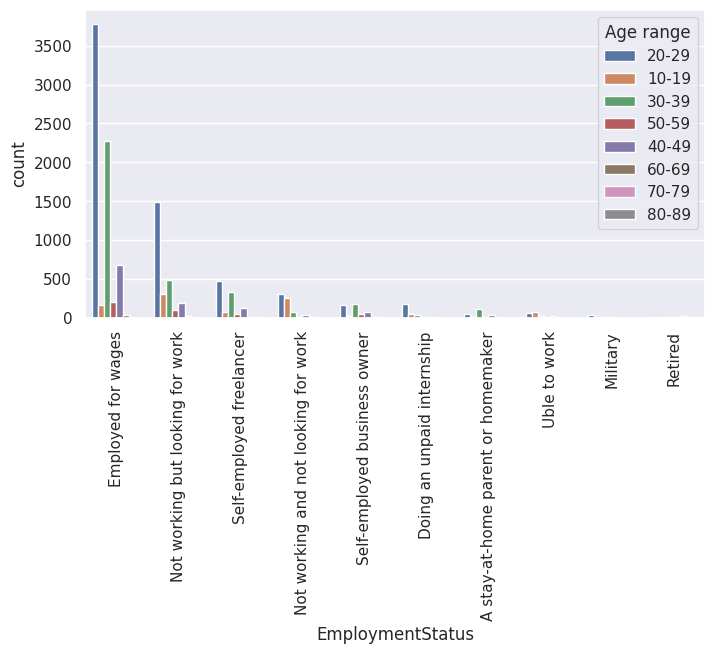

In [ ]:
c = sns.countplot(x='EmploymentStatus', order=clear_dataset['EmploymentStatus'].value_counts().index, hue='Age range', data=clear_dataset)
c.set_xticklabels(c.get_xticklabels(), rotation=90)
pass

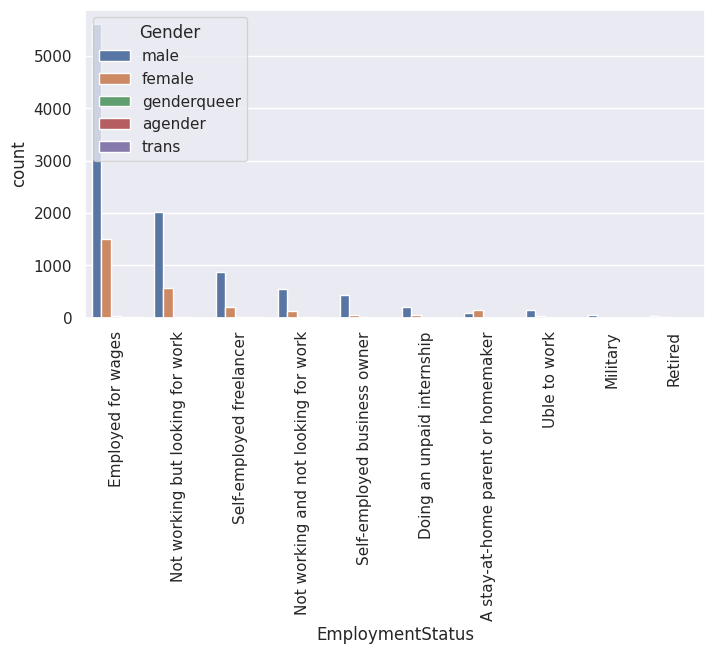

In [ ]:
c = sns.countplot(x='EmploymentStatus', order=clear_dataset['EmploymentStatus'].value_counts().index, hue='Gender', data=clear_dataset)
c.set_xticklabels(c.get_xticklabels(), rotation=90)
pass

Видно, что мужчины в возрасте до 30 лет сильно преобладают в категории занятых на оплачиваемой должности.

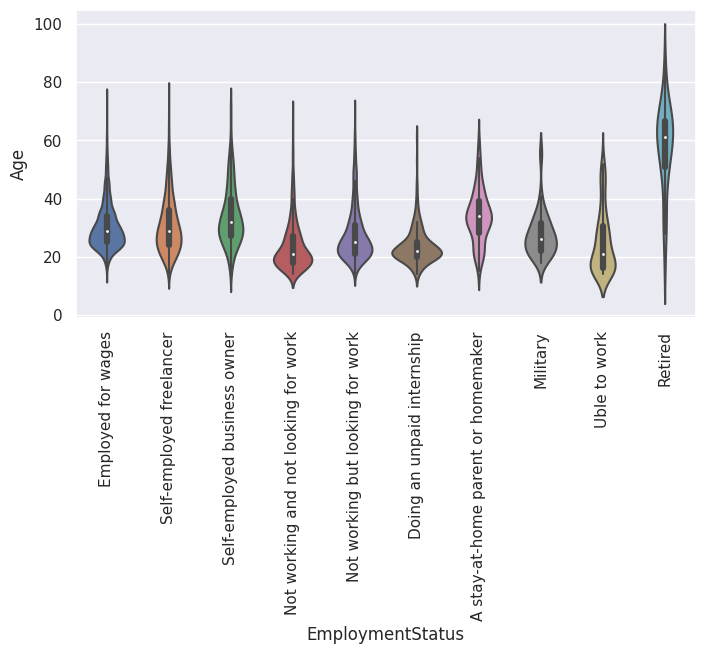

In [ ]:
c = sns.violinplot(x="EmploymentStatus", y="Age", data=clear_dataset)
c.set_xticklabels(c.get_xticklabels(), rotation=90)
pass

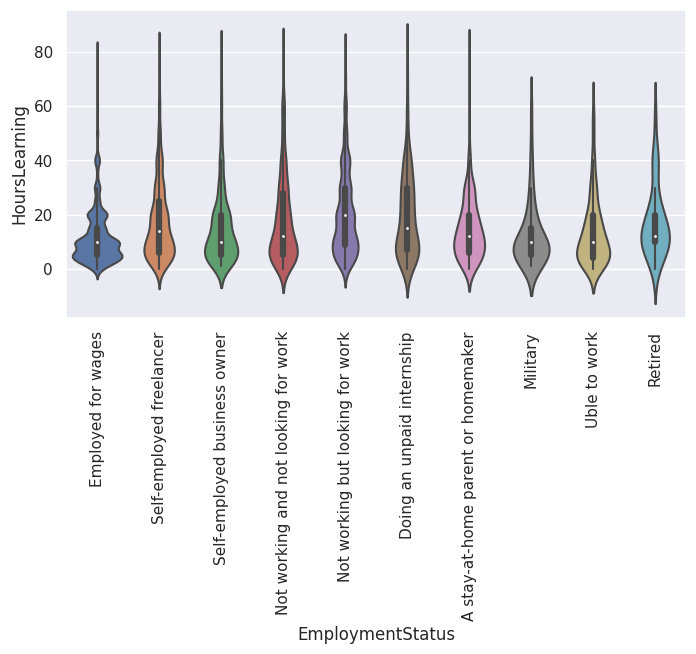

In [ ]:
c = sns.violinplot(x="EmploymentStatus", y="HoursLearning", data=clear_dataset)
c.set_xticklabels(c.get_xticklabels(), rotation=90)
pass

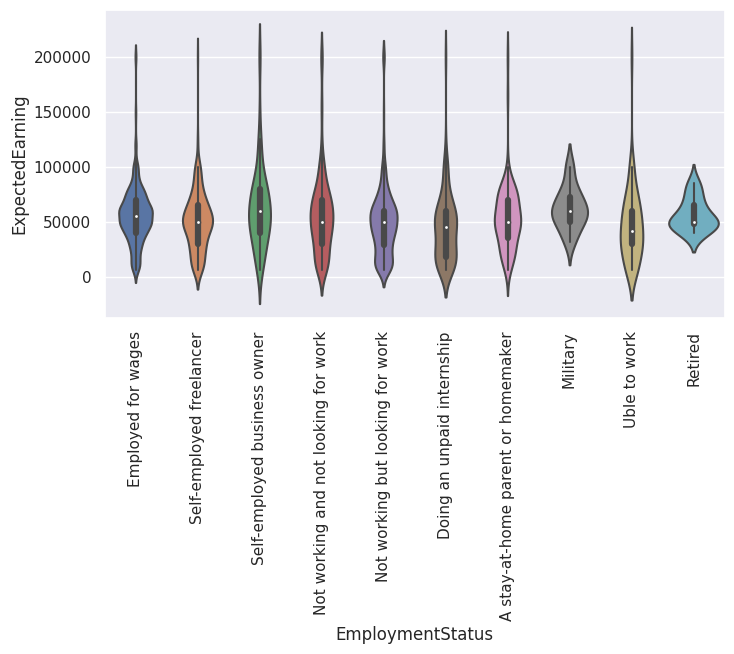

In [ ]:
c = sns.violinplot(x="EmploymentStatus", y="ExpectedEarning", data=clear_dataset)
c.set_xticklabels(c.get_xticklabels(), rotation=90)
pass

Стоит отметить, что распределение для самозанятых фрилансеов и владельцев бизнеса схожи. Это будет затруднять классификацию данных.

In [13]:
clear_dataset.shape

(15504, 114)

In [14]:
clear_dataset.isna().sum()

Age                              1996
Age range                        1996
AttendedBootcamp                  238
BootcampFinish                  14582
BootcampFullJobAfter            14875
BootcampLoanYesNo               14582
BootcampMonthsAgo               14878
Bootcampme                      14620
BootcampPostSalary              15177
BootcampRecommend               14579
ChildrenNumber                  12954
CityPopulation                   1978
CodeEventBootcamp               15462
CodeEventCoffee                 13442
CodeEventConferences            12631
CodeEventDjangoGirls            15486
CodeEventGameJam                15482
CodeEventGirlDev                14947
CodeEventHackathons             13106
CodeEventMeetup                 15191
CodeEventNodeSchool             15027
CodeEventNone                    6667
CodeEventOther                  14589
CodeEventRailsBridge            15251
CodeEventRailsGirls             15490
CodeEventStartUpWknd            14772
CodeEventWom

В нашем признаке состояния найма находится 2677 (17.14%) пропущенных значений, что ставит вопрос о том как правильно обработать эти значения?

Первый вариант - оставить пустые значения для обучения модели, и заполнить для них все пропущенные значения

Второй - Удалить все строки, в которых есть пропущенные значения

Так как нельзя точно сказать какой подход будет более оптимальным, создадим 2 набора данных predict_dataset для данных с пропусками и delete_dataset для данных с полностью заполненными строками.

Характеристики NetworkID, ID.x, ID.y, Part1EndTime, Part1StartTime, Part2EndTime, Part2StartTime не представляют для нас информационной полезности, так как используются для внутренней идентификации пользователей.

 **обработка номинальных признаков**

In [7]:
import copy

predict_dataset = copy.deepcopy(clear_dataset)
predict_dataset.drop(['BootcampFinish', 'BootcampFullJobAfter', 'BootcampLoanYesNo', 'BootcampMonthsAgo', 'Bootcampme', 'BootcampPostSalary', 'BootcampRecommend', 'CodeEventBootcamp', 'CodeEventCoffee', 'CodeEventConferences', 'CodeEventDjangoGirls', 'CodeEventGameJam', 'CodeEventGirlDev', 'CodeEventHackathons', 'CodeEventMeetup', 'CodeEventNodeSchool', 'CodeEventNone', 'CodeEventOther', 'CodeEventRailsBridge', 'CodeEventRailsGirls', 'CodeEventStartUpWknd', 'CodeEventWomenCode', 'CodeEventWorkshop', 'CommuteTime', 'ID.x', 'ID.y', 'NetworkID', 'Part1EndTime', 'Part1StartTime', 'Part2EndTime', 'Part2StartTime', 'PodcastChangeLog', 'PodcastCodeNewbie', 'PodcastCodingBlocks', 'PodcastDeveloperTea', 'PodcastDotNetRocks', 'PodcastHanselminutes', 'PodcastJSJabber', 'PodcastJsAir', 'PodcastNone', 'PodcastOther', 'PodcastProgrammingThrowDown', 'PodcastRubyRogues', 'PodcastSEDaily', 'PodcastShopTalk', 'PodcastTalkPython', 'PodcastWebAhead', 'ResourceBlogs', 'ResourceBooks', 'ResourceCodeWars', 'ResourceCodecademy', 'ResourceCoursera', 'ResourceDevTips', 'ResourceEdX', 'ResourceEggHead', 'ResourceFCC', 'ResourceGoogle', 'ResourceHackerRank', 'ResourceKhacademy', 'ResourceLynda', 'ResourceMDN', 'ResourceOdinProj', 'ResourceOther', 'ResourcePluralSight', 'ResourceReddit', 'ResourceSkillCrush', 'ResourceSoloLearn', 'ResourceStackOverflow', 'ResourceTreehouse', 'ResourceUdacity', 'ResourceUdemy', 'ResourceW3Schools', 'ResourceYouTube'], axis='columns', inplace=True)
predict_dataset.drop(['JobRelocateYesNo', 'JobApplyWhen', 'HasChildren', 'FinciallySupporting', 'HomeMortgageOwe', 'StudentDebtOwe', 'MaritalStatus', 'EmploymentFieldOther', 'EmploymentStatusOther', 'JobRoleInterest',  'JobRoleInterestOther'], axis='columns', inplace=True)
predict_dataset.fillna(predict_dataset.median(axis = 0), axis=0 , inplace=True)

In [56]:
predict_dataset.isna().sum()

Age                                0
Age range                       1996
AttendedBootcamp                   0
ChildrenNumber                     0
CityPopulation                  1978
CountryCitizen                  1955
CountryLive                     2000
EmploymentField                 7917
EmploymentStatus                2677
ExpectedEarning                    0
Gender                          1862
HasDebt                            0
HasFincialDependents               0
HasHighSpdInternet                 0
HasHomeMortgage                    0
HasServedInMilitary                0
HasStudentDebt                     0
HoursLearning                      0
Income                             0
IsEthnicMinority                   0
IsReceiveDiabilitiesBenefits       0
IsSoftwareDev                      0
IsUnderEmployed                    0
JobPref                         4410
JobWherePref                    8808
LanguageAtHome                  2028
MoneyForLearning                   0
M

**обработка категориальных признаков**

In [8]:
predict_dataset['Age range'].fillna(predict_dataset['Age range'].mode().iloc[0], inplace=True)
predict_dataset['CityPopulation'].fillna(predict_dataset['CityPopulation'].mode().iloc[0], inplace=True)
predict_dataset['CountryCitizen'].fillna(predict_dataset['CountryCitizen'].mode().iloc[0], inplace=True)
predict_dataset['CountryLive'].fillna(predict_dataset['CountryLive'].mode().iloc[0], inplace=True)
predict_dataset['EmploymentField'].fillna(predict_dataset['EmploymentField'].mode().iloc[0], inplace=True)
predict_dataset['Gender'].fillna(predict_dataset['Gender'].mode().iloc[0], inplace=True)
predict_dataset['JobPref'].fillna(predict_dataset['JobPref'].mode().iloc[0], inplace=True)
predict_dataset['JobWherePref'].fillna(predict_dataset['JobWherePref'].mode().iloc[0], inplace=True)
predict_dataset['LanguageAtHome'].fillna(predict_dataset['LanguageAtHome'].mode().iloc[0], inplace=True)
predict_dataset['SchoolDegree'].fillna(predict_dataset['SchoolDegree'].mode().iloc[0], inplace=True)
predict_dataset['SchoolMajor'].fillna(predict_dataset['SchoolMajor'].mode().iloc[0], inplace=True)
predict_dataset['SchoolMajor'].fillna(predict_dataset['SchoolMajor'].mode().iloc[0], inplace=True)
predict_dataset['SchoolMajor'].fillna(predict_dataset['SchoolMajor'].mode().iloc[0], inplace=True)

In [58]:
predict_dataset.isna().sum()

Age                                0
Age range                          0
AttendedBootcamp                   0
ChildrenNumber                     0
CityPopulation                     0
CountryCitizen                     0
CountryLive                        0
EmploymentField                    0
EmploymentStatus                2677
ExpectedEarning                    0
Gender                             0
HasDebt                            0
HasFincialDependents               0
HasHighSpdInternet                 0
HasHomeMortgage                    0
HasServedInMilitary                0
HasStudentDebt                     0
HoursLearning                      0
Income                             0
IsEthnicMinority                   0
IsReceiveDiabilitiesBenefits       0
IsSoftwareDev                      0
IsUnderEmployed                    0
JobPref                            0
JobWherePref                       0
LanguageAtHome                     0
MoneyForLearning                   0
M

In [9]:
predict_dataset.dropna(inplace=True)


In [60]:
predict_dataset.shape

(12827, 30)

**Исключение пропущенных значений**\
Соберем второй датасет, удаляя все объекты содержащие пропуски

In [10]:
delete_dataset = copy.deepcopy(clear_dataset)
delete_dataset.drop(['BootcampFinish', 'BootcampFullJobAfter', 'BootcampLoanYesNo', 'BootcampMonthsAgo', 'Bootcampme', 'BootcampPostSalary', 'BootcampRecommend', 'CodeEventBootcamp', 'CodeEventCoffee', 'CodeEventConferences', 'CodeEventDjangoGirls', 'CodeEventGameJam', 'CodeEventGirlDev', 'CodeEventHackathons', 'CodeEventMeetup', 'CodeEventNodeSchool', 'CodeEventNone', 'CodeEventOther', 'CodeEventRailsBridge', 'CodeEventRailsGirls', 'CodeEventStartUpWknd', 'CodeEventWomenCode', 'CodeEventWorkshop', 'CommuteTime', 'ID.x', 'ID.y', 'NetworkID', 'Part1EndTime', 'Part1StartTime', 'Part2EndTime', 'Part2StartTime', 'PodcastChangeLog', 'PodcastCodeNewbie', 'PodcastCodingBlocks', 'PodcastDeveloperTea', 'PodcastDotNetRocks', 'PodcastHanselminutes', 'PodcastJSJabber', 'PodcastJsAir', 'PodcastNone', 'PodcastOther', 'PodcastProgrammingThrowDown', 'PodcastRubyRogues', 'PodcastSEDaily', 'PodcastShopTalk', 'PodcastTalkPython', 'PodcastWebAhead', 'ResourceBlogs', 'ResourceBooks', 'ResourceCodeWars', 'ResourceCodecademy', 'ResourceCoursera', 'ResourceDevTips', 'ResourceEdX', 'ResourceEggHead', 'ResourceFCC', 'ResourceGoogle', 'ResourceHackerRank', 'ResourceKhacademy', 'ResourceLynda', 'ResourceMDN', 'ResourceOdinProj', 'ResourceOther', 'ResourcePluralSight', 'ResourceReddit', 'ResourceSkillCrush', 'ResourceSoloLearn', 'ResourceStackOverflow', 'ResourceTreehouse', 'ResourceUdacity', 'ResourceUdemy', 'ResourceW3Schools', 'ResourceYouTube'], axis='columns', inplace=True)
delete_dataset.drop(['JobRelocateYesNo', 'JobApplyWhen', 'HasChildren', 'FinciallySupporting', 'HomeMortgageOwe', 'StudentDebtOwe', 'MaritalStatus', 'EmploymentFieldOther', 'EmploymentStatusOther', 'JobRoleInterest', 'JobRoleInterestOther'], axis='columns', inplace=True)


In [11]:
delete_dataset.dropna(inplace=True)

In [12]:
delete_dataset.shape

(249, 30)

**Обработка категореальных признаков**

Для алгоритмов нам потребуется провести бинаризацию данных для всех категориальных признаков.

In [13]:
def dummies(name, data):
    return_data = data
    return_data[name] = return_data[name].astype('category')
    p_dummies = pd.get_dummies(return_data[name])   
    return_data = pd.concat([return_data, p_dummies], axis=1)
    return return_data

predict_dataset = dummies('Age range', predict_dataset)    
predict_dataset = dummies('CityPopulation', predict_dataset)
predict_dataset = dummies('CountryCitizen', predict_dataset)
predict_dataset = dummies('CountryLive', predict_dataset)
predict_dataset = dummies('EmploymentField', predict_dataset)
predict_dataset = dummies('Gender', predict_dataset)
predict_dataset = dummies('JobPref', predict_dataset)
predict_dataset = dummies('JobWherePref', predict_dataset)
predict_dataset = dummies('LanguageAtHome', predict_dataset)
predict_dataset = dummies('SchoolDegree', predict_dataset)
predict_dataset = dummies('SchoolMajor', predict_dataset)

predict_dataset.drop(['Age range', 'CityPopulation','CountryCitizen','CountryLive','EmploymentField','Gender','JobPref','JobWherePref','LanguageAtHome','SchoolDegree','SchoolMajor'], axis='columns', inplace=True)

In [14]:
delete_dataset = dummies('Age range', delete_dataset)    
delete_dataset = dummies('CityPopulation', delete_dataset)
delete_dataset = dummies('CountryCitizen', delete_dataset)
delete_dataset = dummies('CountryLive', delete_dataset)
delete_dataset = dummies('EmploymentField', delete_dataset)
delete_dataset = dummies('Gender', delete_dataset)
#delete_dataset = dummies('JobApplyWhen', delete_dataset)
delete_dataset = dummies('JobPref', delete_dataset)
#delete_dataset = dummies('JobRoleInterest', delete_dataset)
delete_dataset = dummies('JobWherePref', delete_dataset)
delete_dataset = dummies('LanguageAtHome', delete_dataset)
delete_dataset = dummies('SchoolDegree', delete_dataset)
delete_dataset = dummies('SchoolMajor', delete_dataset)
#delete_dataset = dummies('MaritalStatus', delete_dataset)

delete_dataset.drop(['Age range', 'CityPopulation','CountryCitizen','CountryLive','EmploymentField','Gender','JobPref','JobWherePref','LanguageAtHome','SchoolDegree','SchoolMajor'], axis='columns', inplace=True)

In [66]:
predict_dataset.describe()

Age  ...  tural Sciences
count  12827.000000  ...    12827.000000
mean      29.577064  ...        0.000078
std        8.877629  ...        0.008830
min       14.000000  ...        0.000000
25%       24.000000  ...        0.000000
50%       28.000000  ...        0.000000
75%       34.000000  ...        0.000000
max       86.000000  ...        1.000000

[8 rows x 946 columns]

In [27]:
predict_dataset.shape

(12827, 947)

In [28]:
delete_dataset.describe()

Age  ...  Web Design
count  249.000000  ...  249.000000
mean    36.257028  ...    0.012048
std      6.854934  ...    0.109321
min     24.000000  ...    0.000000
25%     31.000000  ...    0.000000
50%     35.000000  ...    0.000000
75%     41.000000  ...    0.000000
max     61.000000  ...    1.000000

[8 rows x 239 columns]

In [67]:
delete_dataset.shape

(249, 240)

# **Нормализация и деление на выборки**
Так же нормализуем количественные данные, что бы большие величины, не внесли больше вклада в веса сети, чем следовало бы

Для каждого набора данных возьем пропорциональное количество данных -

75%/25% для обучения и тестовых, что бы точнее сравнить результат

In [15]:
n_predict_dataset = pd.concat([predict_dataset.iloc[:, 0],
predict_dataset['ChildrenNumber'],
predict_dataset['ExpectedEarning'],
#predict_dataset['HomeMortgageOwe'],
predict_dataset['HoursLearning'],
predict_dataset['Income'],
predict_dataset['MoneyForLearning'],
predict_dataset['MonthsProgramming'],
#predict_dataset['StudentDebtOwe']
], axis=1)
n_predict_dataset

Age  ChildrenNumber  ...  MoneyForLearning  MonthsProgramming
0      28.0             2.0  ...               0.0                1.0
1      22.0             2.0  ...              20.0                2.0
2      19.0             2.0  ...              50.0               24.0
3      26.0             2.0  ...             100.0                3.0
4      20.0             2.0  ...            1300.0               48.0
...     ...             ...  ...               ...                ...
15615  39.0             2.0  ...               0.0               24.0
15616  27.0             2.0  ...             100.0                6.0
15617  37.0             2.0  ...               0.0                2.0
15618  26.0             2.0  ...              30.0              120.0
15619  22.0             2.0  ...               0.0                3.0

[12827 rows x 7 columns]

In [16]:
n_delete_dataset = pd.concat([delete_dataset.iloc[:, 0],
delete_dataset['ChildrenNumber'],
delete_dataset['ExpectedEarning'],
#delete_dataset['HomeMortgageOwe'],
delete_dataset['HoursLearning'],
delete_dataset['Income'],
delete_dataset['MoneyForLearning'],
delete_dataset['MonthsProgramming'],
#delete_dataset['StudentDebtOwe']
], axis=1)
n_delete_dataset

Age  ChildrenNumber  ...  MoneyForLearning  MonthsProgramming
72     39.0             1.0  ...              80.0                4.0
77     36.0             1.0  ...             400.0               18.0
102    46.0             3.0  ...             300.0              100.0
113    27.0             2.0  ...             100.0                0.0
161    37.0             1.0  ...             150.0                9.0
210    27.0             2.0  ...               0.0                1.0
258    37.0             2.0  ...             100.0               24.0
268    39.0             3.0  ...            1000.0               13.0
326    30.0             2.0  ...            3000.0                5.0
380    38.0             1.0  ...              60.0               25.0
399    35.0             1.0  ...             100.0               36.0
430    30.0             2.0  ...               0.0                9.0
439    29.0             1.0  ...             500.0               24.0
443    35.0             2.0  ...               0.0                1.0
550    35.0             2.0  ...             100.0               10.0
560    26.0             1.0  ...             200.0                3.0
639    39.0             3.0  ...             100.0               24.0
657    29.0             3.0  ...              50.0               30.0
663    54.0             2.0  ...               0.0              200.0
862    32.0             2.0  ...               0.0               10.0
863    37.0             1.0  ...            1000.0               24.0
939    44.0             2.0  ...            1200.0                9.0
1042   32.0             1.0  ...            2000.0                7.0
1048   34.0             1.0  ...              10.0                8.0
1208   28.0             2.0  ...               0.0               10.0
1248   36.0             2.0  ...               0.0                2.0
1276   33.0             2.0  ...               0.0                1.0
1296   29.0             3.0  ...               0.0                3.0
1312   31.0             2.0  ...             100.0                8.0
1315   37.0             2.0  ...             100.0                6.0
1332   41.0             1.0  ...             500.0                4.0
1345   41.0             1.0  ...            1000.0              120.0
1406   30.0             2.0  ...               0.0                2.0
1475   32.0             1.0  ...               0.0                3.0
1596   33.0             1.0  ...             200.0                3.0
1649   37.0             2.0  ...               0.0               12.0
1659   42.0             1.0  ...            1000.0               10.0
1660   38.0             1.0  ...             200.0                6.0
1860   55.0             4.0  ...               0.0               10.0
1869   45.0             1.0  ...           10000.0                9.0
1906   31.0             1.0  ...             400.0                2.0
1964   27.0             2.0  ...               0.0                0.0
1985   41.0             1.0  ...            5000.0               20.0
2026   36.0             3.0  ...              10.0                9.0
2030   29.0             1.0  ...               0.0                1.0
2061   45.0             2.0  ...            1000.0                3.0
2080   38.0             2.0  ...             300.0                2.0
2085   52.0             2.0  ...           15000.0               16.0
2215   44.0             1.0  ...            1000.0                3.0
2259   28.0             1.0  ...            1000.0                6.0
2261   48.0             1.0  ...             300.0                3.0
2530   41.0             2.0  ...             500.0               60.0
2651   30.0             2.0  ...               0.0               24.0
2668   33.0             1.0  ...               0.0                6.0
2714   33.0             1.0  ...             200.0                3.0
2720   33.0             2.0  ...               0.0                7.0
2752   37.0       

После выделения количественных признаков, нормализируем их

In [17]:
npred = (n_predict_dataset - n_predict_dataset.mean(axis = 0))/n_predict_dataset.std(axis = 0)
ndel  = (n_delete_dataset - n_delete_dataset.mean(axis = 0))/n_delete_dataset.std(axis = 0)

npred.describe()

Age  ChildrenNumber  ...  MoneyForLearning  MonthsProgramming
count  1.282700e+04    1.282700e+04  ...      1.282700e+04       1.282700e+04
mean  -7.128295e-16   -1.098643e-15  ...     -9.762381e-16       2.218239e-16
std    1.000000e+00    1.000000e+00  ...      1.000000e+00       1.000000e+00
min   -1.754642e+00   -3.989081e+00  ...     -2.349038e-01      -4.886646e-01
25%   -6.282155e-01    3.957359e-02  ...     -2.349038e-01      -4.279409e-01
50%   -1.776447e-01    3.957359e-02  ...     -2.281360e-01      -3.064935e-01
75%    4.982114e-01    3.957359e-02  ...     -1.672258e-01      -2.875147e-03
max    6.355631e+00    3.226881e+01  ...      2.683630e+01       1.408502e+01

[8 rows x 7 columns]

In [34]:
ndel.describe()

Age  ChildrenNumber  ...  MoneyForLearning  MonthsProgramming
count  2.490000e+02    2.490000e+02  ...      2.490000e+02       2.490000e+02
mean  -4.628159e-16   -1.087929e-16  ...      1.449086e-17       5.573409e-19
std    1.000000e+00    1.000000e+00  ...      1.000000e+00       1.000000e+00
min   -1.788059e+00   -9.302416e-01  ...     -3.503386e-01      -4.907510e-01
25%   -7.668970e-01   -9.302416e-01  ...     -3.503386e-01      -3.871064e-01
50%   -1.833757e-01    2.221472e-01  ...     -3.126433e-01      -2.489136e-01
75%    6.919063e-01    2.221472e-01  ...     -1.618624e-01      -7.617255e-02
max    3.609513e+00    4.831703e+00  ...      7.565660e+00       8.146300e+00

[8 rows x 7 columns]

Готовим выходной вектор Y и объединяем наши данные:

In [18]:
predict_dataset.drop(predict_dataset.columns[[0]], axis='columns', inplace=True)
predict_dataset.drop(['ChildrenNumber'], axis='columns', inplace=True)
predict_dataset.drop(['ExpectedEarning'], axis='columns', inplace=True)
#predict_dataset.drop(['HomeMortgageOwe'], axis='columns', inplace=True)
predict_dataset.drop(['HoursLearning'], axis='columns', inplace=True)
predict_dataset.drop(['Income'], axis='columns', inplace=True)
predict_dataset.drop(['MoneyForLearning'], axis='columns', inplace=True)
predict_dataset.drop(['MonthsProgramming'], axis='columns', inplace=True)
#predict_dataset.drop(['StudentDebtOwe'], axis='columns', inplace=True)

In [19]:
delete_dataset.drop(delete_dataset.columns[[0]], axis='columns', inplace=True)
delete_dataset.drop(['ChildrenNumber'], axis='columns', inplace=True)
delete_dataset.drop(['ExpectedEarning'], axis='columns', inplace=True)
#delete_dataset.drop(['HomeMortgageOwe'], axis='columns', inplace=True)
delete_dataset.drop(['HoursLearning'], axis='columns', inplace=True)
delete_dataset.drop(['Income'], axis='columns', inplace=True)
delete_dataset.drop(['MoneyForLearning'], axis='columns', inplace=True)
delete_dataset.drop(['MonthsProgramming'], axis='columns', inplace=True)
#delete_dataset.drop(['StudentDebtOwe'], axis='columns', inplace=True)

In [20]:
ypred = predict_dataset['EmploymentStatus']
ydel = delete_dataset['EmploymentStatus']

In [21]:
predict_dataset.drop(['EmploymentStatus'], axis='columns', inplace=True)
delete_dataset.drop(['EmploymentStatus'], axis='columns', inplace=True)

In [22]:
xpred = pd.concat([npred, predict_dataset], axis=1)
xdel = pd.concat([ndel, delete_dataset], axis=1)

In [41]:
xpred.describe()

Age  ...  tural Sciences
count  1.282700e+04  ...    12827.000000
mean  -7.128295e-16  ...        0.000078
std    1.000000e+00  ...        0.008830
min   -1.754642e+00  ...        0.000000
25%   -6.282155e-01  ...        0.000000
50%   -1.776447e-01  ...        0.000000
75%    4.982114e-01  ...        0.000000
max    6.355631e+00  ...        1.000000

[8 rows x 946 columns]

In [42]:
xdel.describe()

Age  ...  Web Design
count  2.490000e+02  ...  249.000000
mean  -4.628159e-16  ...    0.012048
std    1.000000e+00  ...    0.109321
min   -1.788059e+00  ...    0.000000
25%   -7.668970e-01  ...    0.000000
50%   -1.833757e-01  ...    0.000000
75%    6.919063e-01  ...    0.000000
max    3.609513e+00  ...    1.000000

[8 rows x 239 columns]

In [23]:
xpred = xpred.to_numpy()
xdel = xdel.to_numpy()

In [24]:
ypred = ypred.replace(['Employed for wages', 'Not working but looking for work', 'Self-employed freelancer', 'Not working and not looking for work', 'Self-employed business owner', 'Doing an unpaid internship', 'A stay-at-home parent or homemaker', 'Uble to work', 'Military', 'Retired'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
ydel =   ydel.replace(['Employed for wages', 'Not working but looking for work', 'Self-employed freelancer', 'Not working and not looking for work', 'Self-employed business owner', 'Doing an unpaid internship', 'A stay-at-home parent or homemaker', 'Uble to work', 'Military', 'Retired'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [25]:
ypred = ypred.to_numpy()
ydel = ydel.to_numpy()

Разбиваем данные на обучающие выборки:

In [26]:
from sklearn.model_selection import train_test_split
xpred_train, xpred_test, ypred_train, ypred_test = train_test_split(xpred, ypred, test_size = 0.25, random_state = 13)

npred_train, _ = xpred_train.shape 
npred_test,  _ = xpred_test.shape 

npred_train, npred_test

(9620, 3207)

In [27]:
from sklearn.model_selection import train_test_split
xdel_train, xdel_test, ydel_train, ydel_test = train_test_split(xdel, ydel, test_size = 0.25, random_state = 13)

ndel_train, _ = xdel_train.shape 
ndel_test,  _ = xdel_test.shape 

ndel_train, ndel_test

(186, 63)

# **Запуск классификаторов**
**KNeighborsClassifier**\
Для построения модели классификации используем классический метод K ближних соседей на первом наборе predict_data

In [83]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(xpred_train, ypred_train)

ypred_train_res = knn.predict(xpred_train)
error_pred_train = np.mean(ypred_train != ypred_train_res)
print(error_pred_train)

0.3048856548856549


Смотрим ошибку на тестовых данных

In [85]:
ypred_test_res = knn.predict(xpred_test)

error_pred_test = np.mean(ypred_test != ypred_test_res)
print(error_pred_test)

0.34580604926722797


Повторяем процедуру для второго набора данных delete_dataset

In [86]:
knn2 = KNeighborsClassifier(n_neighbors = 10)
knn2.fit(xdel_train, ydel_train)

ydel_train_res = knn2.predict(xdel_train)
err_dell_train = np.mean(ydel_train != ydel_train_res)
print(err_dell_train)

0.053763440860215055


In [88]:
ydel_test_res = knn2.predict(xdel_test)

error_del_test = np.mean(ydel_test != ydel_test_res)
print(error_del_test)

0.06349206349206349


In [28]:
from sklearn.neighbors import KNeighborsClassifier
for i in range(10,0,-1):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(xpred_train, ypred_train)

    ypred_train_res = knn.predict(xpred_train)
    err_pred_train = np.mean(ypred_train != ypred_train_res)
    
    ypred_test_res = knn.predict(xpred_test)
    err_test = np.mean(ypred_test != ypred_test_res)
    
    print(i, err_pred_train, err_test)

10 0.3048856548856549 0.34580604926722797
9 0.3028066528066528 0.3461178671655753
8 0.30072765072765073 0.3479887745556595
7 0.2968814968814969 0.3479887745556595
6 0.291995841995842 0.35360149672591207
5 0.28378378378378377 0.35547240411599623
4 0.2714137214137214 0.3666978484565014
3 0.2563409563409563 0.3776114748986592
2 0.2262993762993763 0.37043966323666977
1 0.0 0.45275958840037417


Построим график для predict_data

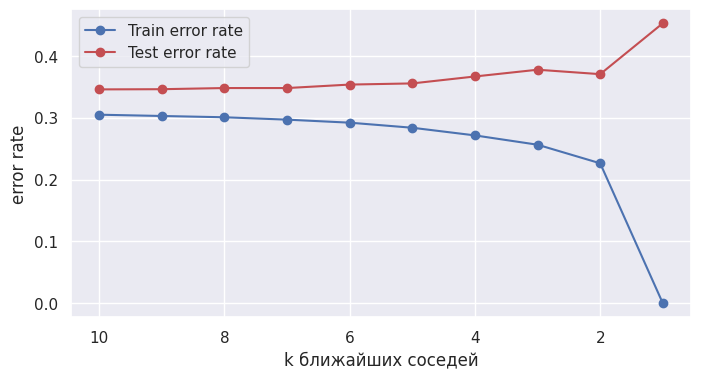

In [31]:
plt.plot(range(10,0,-1), [0.30488565, 0.30280665, 0.30072765, 0.29688149, 0.29199584, 0.28378378, 0.27141372, 0.25634095, 0.22629937, 0], '-ob', label="Train error rate")
plt.plot(range(10,0,-1), [0.34580604, 0.34611786, 0.34798877, 0.34798877, 0.35360149, 0.35547240, 0.36669784, 0.37761147, 0.37043966, 0.45275958], '-or', label="Test error rate")
plt.gca().invert_xaxis()
plt.legend()
plt.xlabel('k ближайших соседей')
plt.ylabel('error rate')
plt.show()

Аналогичные операции для delete_dataset

In [32]:
for i in range(10,0,-1):
    knn2 = KNeighborsClassifier(n_neighbors = i)
    knn2.fit(xdel_train, ydel_train)

    ydel_train_res = knn2.predict(xdel_train)
    err_del_train = np.mean(ydel_train != ydel_train_res)
    
    ydel_test_res = knn2.predict(xdel_test)
    err_test = np.mean(ydel_test != ydel_test_res)
    
    print(i, err_del_train, err_test)

10 0.053763440860215055 0.06349206349206349
9 0.053763440860215055 0.06349206349206349
8 0.053763440860215055 0.06349206349206349
7 0.053763440860215055 0.06349206349206349
6 0.053763440860215055 0.06349206349206349
5 0.053763440860215055 0.06349206349206349
4 0.053763440860215055 0.06349206349206349
3 0.053763440860215055 0.06349206349206349
2 0.053763440860215055 0.06349206349206349
1 0.0 0.09523809523809523


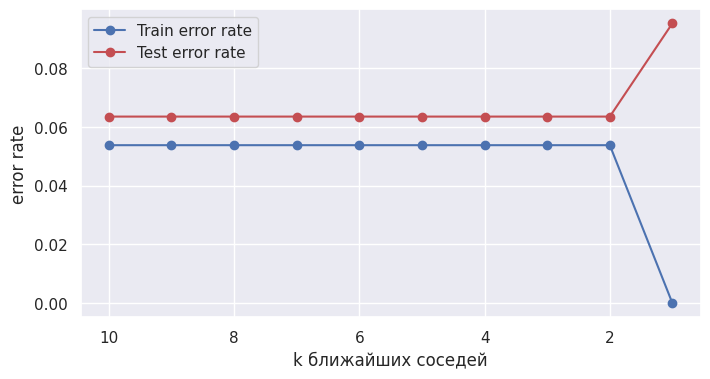

In [33]:
plt.plot(range(10,0,-1), [0.05376344, 0.05376344, 0.05376344, 0.05376344, 0.05376344, 0.05376344, 0.05376344, 0.05376344, 0.05376344, 0], '-ob', label="Train error rate")
plt.plot(range(10,0,-1), [0.06349206, 0.06349206, 0.06349206, 0.06349206, 0.06349206, 0.06349206, 0.06349206, 0.06349206, 0.06349206, 0.09523809], '-or', label="Test error rate")
plt.gca().invert_xaxis()
plt.legend()
plt.xlabel('k ближайших соседей')
plt.ylabel('error rate')
plt.show()

Для сравнения результата попробуем использовать другой подход. На датасете с убранными пустыми полями значение ошибки получилось намного ниже.

**Random forest**

In [34]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(xpred_train, ypred_train)

ypred_train_res = rf.predict(xpred_train)
ypred_test_res = rf.predict(xpred_test)

err_pred_train = np.mean(ypred_train != ypred_train_res)
err_test_test  = np.mean(ypred_test  != ypred_test_res)

print(err_pred_train, err_test_test)

0.0 0.25818521983161835


In [35]:
xpred.shape

(12827, 946)

In [41]:
xdel.shape

(249, 239)

В методе к ближайших соседей лучшее значение при заполнении пропущенных значений получилось на уровне 34,58%. В подходе с удалением всех строк с пропусками ошибка на тесте составила всего лишь 6,35%, но учитывая малый размер этой выборки, ее релевантность.

Random forest - отработал лучше чем метод к ближайших соседей для этой задачи
На том же обьеме выборки ошибка на тесте составила 25,82%.

Улучшить точность можно:
*   Провести более тщательную предподгатовку и заполнить пустые значения для
столбцов, связанных с буткемпами, подскастами и пр. Так как в случае их отсутствия зачастую значение 0 не проставлялось и оставлялось пустое поле.
*   Обьединить некоторые категории статуса трудовой деятельности, так как многие из них схожи, что приводит к повышению уровня ошибки.

# **РСА**

In [42]:
from sklearn.decomposition import PCA
pca_model = PCA(n_components = 2)
pca_model.fit(xpred)
print("Главные компоненты (по строкам):")
print(pca_model.components_)
print("Дисперсии:")
print(pca_model.explained_variance_)
print("Среднеквадратические отклонениея:")
print(np.sqrt(pca_model.explained_variance_))

Главные компоненты (по строкам):
[[ 5.60078083e-01  8.55481202e-02  2.13409272e-01 ... -3.95763911e-05
   5.07951533e-05 -3.81042343e-05]
 [ 5.91035357e-02  5.29983785e-02  5.43954421e-01 ...  8.64675194e-06
   2.54101605e-04  9.11902065e-06]]
Дисперсии:
[1.7831901  1.15881591]
Среднеквадратические отклонениея:
[1.33536141 1.07648312]


In [43]:
pca = pca_model.transform(xpred)
print(pca.shape)
print(pca)

(12827, 2)
[[-0.46218523  1.01838854]
 [-1.39689901  1.03566493]
 [-0.68981889  0.11717266]
 ...
 [ 0.28306418  0.09576631]
 [-0.17345646 -1.37848772]
 [-1.0533215  -0.06354855]]


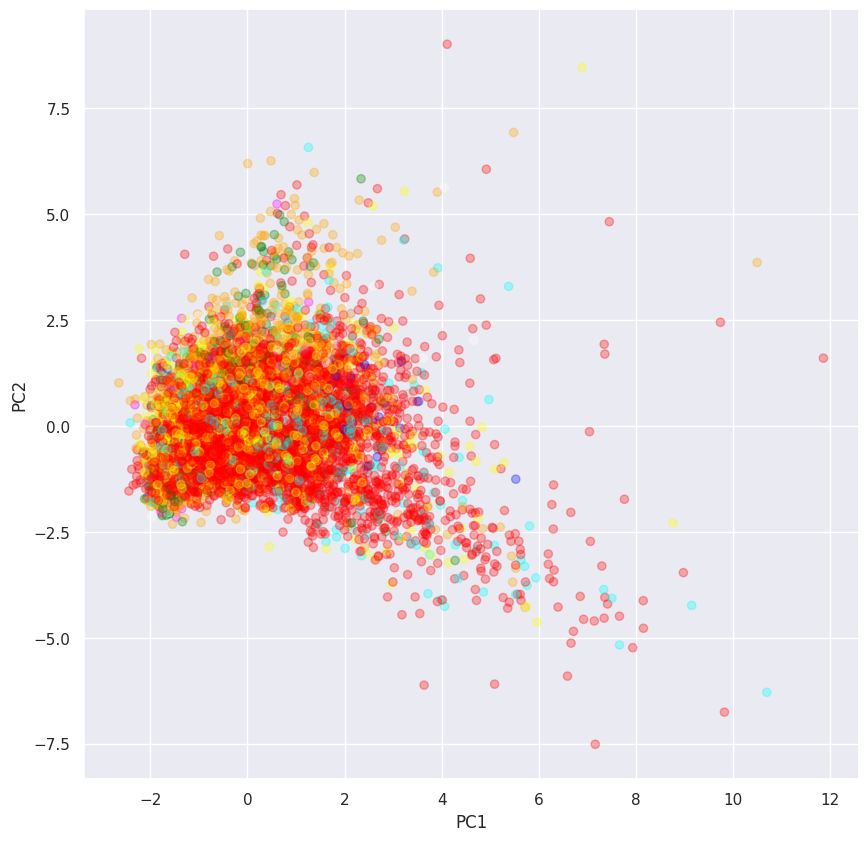

In [50]:

plt.figure(figsize = (10,10))
colors = ['red' if s == 1 
          else 'orange' if s == 2 
          else 'yellow' if s == 3 
          else 'green' if s == 4 
          else 'cyan' if s == 5
          else 'magenta' if s == 6
          else 'white' if s == 7
          else 'peru' if s == 8
          else 'silver' if s == 9
          else 'blue' for s in ypred]

plt.scatter(pca[:, 0], pca[:, 1], color = colors, alpha = 0.3)
plt.xlabel('PC1')
plt.ylabel('PC2')
pass


Различные цвета обозначают различные категории занятости студента

1 - 'Employed for wages' - 'red'\
2 - 'Not working but looking for work' - 'orange'\
3 - 'Self-employed freelancer' - 'yellow'\
4 - 'Not working and not looking for work' - 'green'\
5 - 'Self-employed business owner' - 'cyan'\
6 - 'Doing an unpaid internship' - 'magenta'\
7 - 'A stay-at-home parent or homemaker' - 'white'\
8 - 'Uble to work' - 'peru'\
9 - 'Military' - 'silver'\
10- 'Retired' - 'blue'

In [53]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(xpred_train, ypred_train)

ypred_train_res = rf.predict(xpred_train)
ypred_test_res = rf.predict(xpred_test)

err_pred_train = 1 - np.mean(ypred_train != ypred_train_res)
err_test_test  = 1 - np.mean(ypred_test  != ypred_test_res)

print("Точность тренировочной выборки:", err_pred_train)
print("Точность тестовой выборки:", err_test_test)

Точность тренировочной: 1.0
Точность тестовой: 0.7430620517617712


In [59]:
def PCA_FOR(N, n_est, xpr, ypr):
    res_train, res_test = [], []
    for i in range(1, N):
        pca = PCA(n_components = i).fit_transform(xpr)
        xpred_train, xpred_test, ypred_train, ypred_test = train_test_split(pca, ypr, test_size = 0.25, random_state = 13)
        rf = ensemble.RandomForestClassifier(n_estimators = n_est).fit(xpred_train, ypred_train)
        res_train.append(1 - np.mean(ypred_train  != rf.predict(xpred_train)))
        res_test.append(1 - np.mean(ypred_test  != rf.predict(xpred_test)))
        
    return res_train, res_test
  

In [92]:
res_train, res_test = PCA_FOR(15, 1000, xpred, ypred)

In [93]:
res_train [0.9997920997920998, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

[0.9997920997920998,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [94]:
res_test 

[0.3829123791705644,
 0.507327720611163,
 0.5718740255690677,
 0.6046149048955409,
 0.6220767072029935,
 0.6342376052385407,
 0.6626130339881509,
 0.6613657623947615,
 0.6607421265980667,
 0.6638603055815404,
 0.6632366697848456,
 0.6735266604303087,
 0.6716557530402245,
 0.6697848456501403]

Text(0.5, 1.0, 'Точность тестовой выборки:')

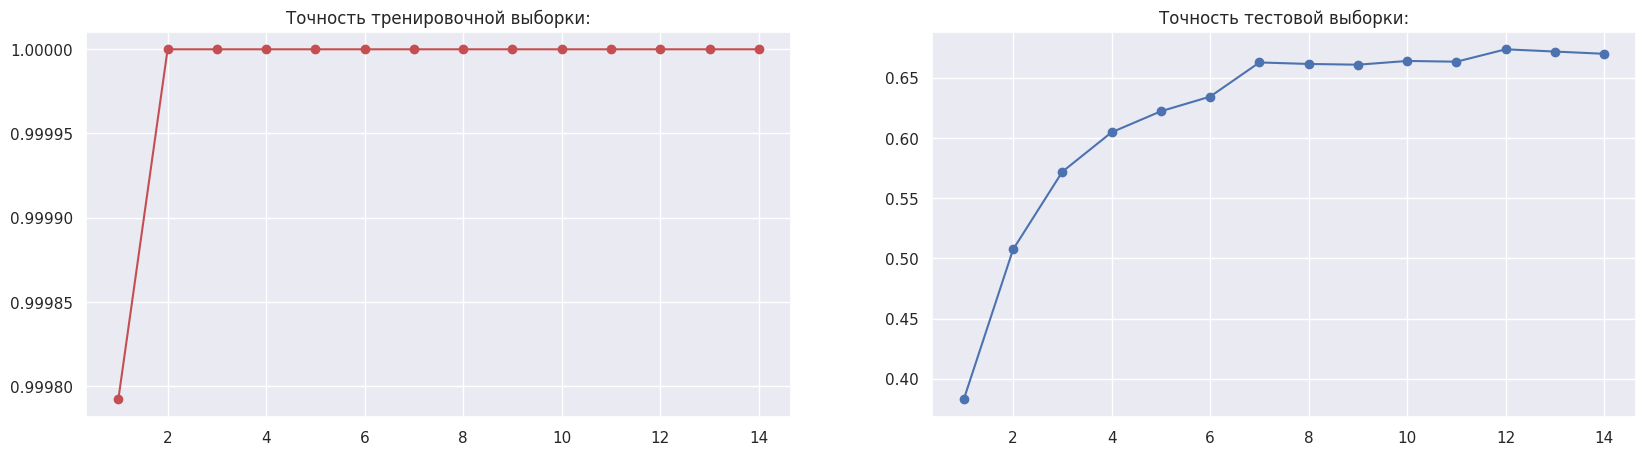

In [98]:
size = plt.figure(figsize=(20,5))
ax1 = size.add_subplot(121)
ax2 = size.add_subplot(122)
x1 = range(1, 15)
ax1.plot(x1, [0.9997920997920998, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'r-o')
ax2.plot(x1, [0.3829123791705644, 0.507327720611163, 0.5718740255690677, 0.6046149048955409, 0.6220767072029935, 0.6342376052385407, 0.6626130339881509, 0.6613657623947615, 0.6607421265980667, 0.6638603055815404, 0.6632366697848456, 0.6735266604303087, 0.6716557530402245, 0.6697848456501403],  'b-o') 
ax1.set_title("Точность тренировочной выборки:")
ax2.set_title("Точность тестовой выборки:")

In [96]:
print("Максимальная точность на тренировочной выборке:", np.max(res_train), "достигается при ", np.argmax(res_train) + 1, "компонентах")
print("Максимальная точность на тестовой выборке:", np.max(res_test), "достигается при ", np.argmax(res_test) + 1, "компонентах")

Максимальная точность на тренировочной выборке: 1.0 достигается при  2 компонентах
Максимальная точность на тестовой выборке: 0.6735266604303087 достигается при  12 компонентах


При использовании PCA точность на тренировочной выборке не изменилась, 
 а на тестовой выборке снизилась на 6,95353913314625